![](2022-11-18-19-49-38.png)

# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

In [2]:
X = np.linspace(0,50,501)
y = np.sin(X)

In [3]:
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

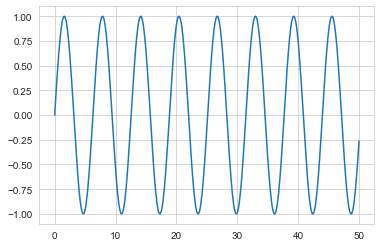

In [5]:
plt.plot(X,y);

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data = y , index = X , columns=['sin(X)'])

In [7]:
df

,sin(X)
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

In [8]:
len(df)

501

In [9]:
test_percent = 0.15

In [10]:
len(df)*test_percent

75.14999999999999

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

In [12]:
test_ind = int(len(df) - test_point)
test_ind

426

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,sin(X)
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [15]:
test

,sin(X)
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

__TimeSeriesGenerator --->__ Almost doing the same thing with ImageDataGenerator which we used in CNN

We used train_scaled as a __data__ and also as a __targets__ because in RNN it's the same, feature and target label.

__length = 3 --->__ The length of sequences. "Predict the next 4th value with the 3 values you know"

__batch_size --->__ 'How many data will there be in a batch according to the above condition?' We have done it here one by one, but it is not possible to do this in large datasets. (It is recommended to do it individually if possible.)

__stride = 1 --->__ 'Predict the next 4th value with the 3 values you know' but if stride = 2 --> 'Predict the 5th value with the 3 values you know.'

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#help(TimeseriesGenerator)

In [21]:
# Define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [22]:
len(train_scaled)

426

In [23]:
len(generator) # len(generator) = (len(train)-lenght)/(batch_size*stride)  --> This can be think like total batch numbers.

424

In [24]:
generator

In [25]:
generator[0] # Our first train batch.

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [26]:
# What does the first batch look like?
X, y = generator[0]

In [27]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


In [28]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

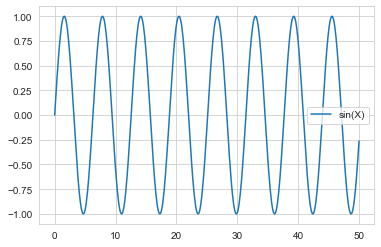

In [29]:
df.plot();

The more length the more training time

In [30]:
length = 64 # Length of the output sequences (in number of timesteps) # Its very key to find out how many times it repeats.
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [31]:
# What does the first batch look like?
X, y = generator[0]

In [32]:
len(generator) # total_batch = (len(train)-lenght)/(batch_size*stride) 

362

In [33]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [34]:
y

array([[0.55827419]])

In [35]:
print(f'Given the Array: \n{X.flatten()}') # Flatten for only better visulization.
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [37]:
# We're only using one feature in our time series
n_features = 1

In [38]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [40]:
# total_params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2)) # Last dense params not added.

10200

In [41]:
model.fit(generator , epochs = 7);

Epoch 1/7
362/362 [==============================] - 3s 7ms/step - loss: 0.0079
Epoch 2/7
362/362 [==============================] - 2s 7ms/step - loss: 3.6251e-05
Epoch 3/7
362/362 [==============================] - 2s 6ms/step - loss: 7.5849e-05
Epoch 4/7
362/362 [==============================] - 2s 7ms/step - loss: 1.8848e-04
Epoch 5/7
362/362 [==============================] - 2s 6ms/step - loss: 0.0012
Epoch 6/7
362/362 [==============================] - 3s 7ms/step - loss: 3.9124e-05
Epoch 7/7
362/362 [==============================] - 2s 6ms/step - loss: 1.4642e-05


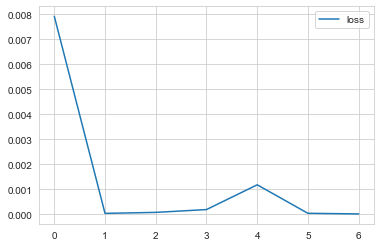

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## Evaluate on Test Data

In [43]:
first_eval_batch = train_scaled[-length:]

In [44]:
first_eval_batch.shape

(64, 1)

In [45]:
generator[0][0].shape # We need our batch with this shape.

(1, 64, 1)

In [46]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features)) # first_eval_batch = np.expand_dims(first_eval_batch, axis=0)
first_eval_batch.shape

(1, 64, 1)

In [47]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 123ms/step


array([[0.00881562]], dtype=float32)

In [48]:
test_scaled[0] # Almost same.

array([0.00885189])

In [49]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [50]:
current_batch.shape

(1, 64, 1)

In [51]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [52]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1) # We update our current batch. We delete first value and we add our last predict. We still have same length(64) batch.

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

In [53]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 14ms/step


In [54]:
predictions_scaled

[array([0.00881562], dtype=float32),
 array([0.02007898], dtype=float32),
 array([0.0360406], dtype=float32),
 array([0.05631261], dtype=float32),
 array([0.08073549], dtype=float32),
 array([0.10905945], dtype=float32),
 array([0.14102504], dtype=float32),
 array([0.1762775], dtype=float32),
 array([0.21476243], dtype=float32),
 array([0.2559388], dtype=float32),
 array([0.29964656], dtype=float32),
 array([0.3454614], dtype=float32),
 array([0.39307228], dtype=float32),
 array([0.44193792], dtype=float32),
 array([0.49173173], dtype=float32),
 array([0.5418286], dtype=float32),
 array([0.5916914], dtype=float32),
 array([0.6407771], dtype=float32),
 array([0.68848634], dtype=float32),
 array([0.7341524], dtype=float32),
 array([0.7772969], dtype=float32),
 array([0.8172701], dtype=float32),
 array([0.85357577], dtype=float32),
 array([0.885839], dtype=float32),
 array([0.91359097], dtype=float32),
 array([0.9366456], dtype=float32),
 array([0.9547296], dtype=float32),
 array([0.96775

In [55]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

In [56]:
predictions = scaler.inverse_transform(predictions_scaled)

In [57]:
predictions

array([[-0.9823591 ],
       [-0.95983257],
       [-0.92790958],
       [-0.88736588],
       [-0.83852052],
       [-0.78187305],
       [-0.7179424 ],
       [-0.64743803],
       [-0.57046878],
       [-0.48811672],
       [-0.4007019 ],
       [-0.30907295],
       [-0.21385196],
       [-0.11612145],
       [-0.01653463],
       [ 0.08365824],
       [ 0.18338305],
       [ 0.28155373],
       [ 0.37697142],
       [ 0.46830276],
       [ 0.55459112],
       [ 0.63453688],
       [ 0.70714763],
       [ 0.77167355],
       [ 0.82717707],
       [ 0.87328601],
       [ 0.9094537 ],
       [ 0.93549965],
       [ 0.9513416 ],
       [ 0.95703177],
       [ 0.95270845],
       [ 0.93875547],
       [ 0.91533044],
       [ 0.88301127],
       [ 0.8421004 ],
       [ 0.79321723],
       [ 0.73677793],
       [ 0.67343658],
       [ 0.60369089],
       [ 0.52830461],
       [ 0.44780453],
       [ 0.36302798],
       [ 0.27455179],
       [ 0.18335253],
       [ 0.09010455],
       [-0

In [58]:
test

,sin(X)
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [59]:
test['RNN_Predictions'] = predictions

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_2068\1546111161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['RNN_Predictions'] = predictions


In [60]:
test

,sin(X),RNN_Predictions
42.600,-0.982,-0.982
42.700,-0.959,-0.960
42.800,-0.925,-0.928
42.900,-0.883,-0.887
43.000,-0.832,-0.839
...,...,...
49.600,-0.617,-0.639
49.700,-0.536,-0.568
49.800,-0.449,-0.490
49.900,-0.357,-0.407


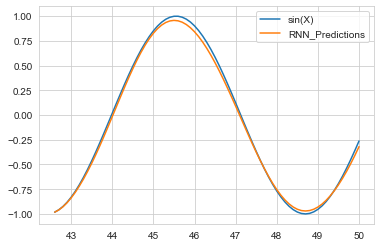

In [61]:
test.plot();

## Early Stopping and Validation Generator

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [64]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)

In [65]:
len(validation_generator)

11

![](2022-11-18-20-51-58.png)

## LSTM

In [66]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [68]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [69]:
model.fit(generator,
        validation_data = validation_generator,
        epochs = 20,
        callbacks = [early_stop]);

Epoch 1/20
362/362 [==============================] - 7s 16ms/step - loss: 0.0067 - val_loss: 8.8262e-05
Epoch 2/20
362/362 [==============================] - 5s 13ms/step - loss: 2.9944e-05 - val_loss: 5.7832e-06
Epoch 3/20
362/362 [==============================] - 4s 11ms/step - loss: 3.3366e-05 - val_loss: 7.0065e-06
Epoch 4/20
362/362 [==============================] - 4s 12ms/step - loss: 3.2515e-05 - val_loss: 5.4836e-06
Epoch 5/20
362/362 [==============================] - 5s 15ms/step - loss: 2.6237e-04 - val_loss: 3.3714e-06
Epoch 6/20
362/362 [==============================] - 4s 11ms/step - loss: 5.2205e-04 - val_loss: 1.0949e-05
Epoch 7/20
362/362 [==============================] - 4s 11ms/step - loss: 1.4677e-05 - val_loss: 1.0289e-05


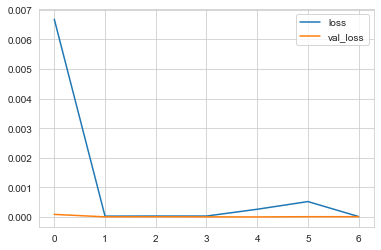

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [71]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 16ms/step


In [72]:
predictions = scaler.inverse_transform(predictions_scaled)

test['LSTM Predictions'] = predictions
test

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_2068\4078338873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = predictions


,sin(X),RNN_Predictions,LSTM Predictions
42.600,-0.982,-0.982,-0.983
42.700,-0.959,-0.960,-0.960
42.800,-0.925,-0.928,-0.928
42.900,-0.883,-0.887,-0.887
43.000,-0.832,-0.839,-0.838
...,...,...,...
49.600,-0.617,-0.639,-0.640
49.700,-0.536,-0.568,-0.570
49.800,-0.449,-0.490,-0.494
49.900,-0.357,-0.407,-0.414


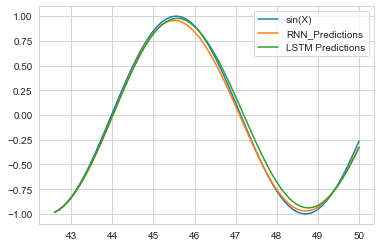

In [73]:
test.plot();

## Retrain and Forecasting

In [74]:
full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

In [75]:
length = 64 

generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [76]:
model = Sequential()

model.add(LSTM(100, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit(generator, epochs = 6)

Epoch 1/6
437/437 [==============================] - 7s 12ms/step - loss: 0.0122
Epoch 2/6
437/437 [==============================] - 5s 11ms/step - loss: 6.8109e-05
Epoch 3/6
437/437 [==============================] - 5s 11ms/step - loss: 1.1481e-04
Epoch 4/6
437/437 [==============================] - 5s 12ms/step - loss: 2.3665e-04
Epoch 5/6
437/437 [==============================] - 5s 12ms/step - loss: 0.0104
Epoch 6/6
437/437 [==============================] - 5s 12ms/step - loss: 7.7153e-06


In [77]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 21ms/step


In [78]:
forecast = scaler.inverse_transform(forecast)

In [79]:
forecast

array([[-0.16435243],
       [-0.06379311],
       [ 0.03793159],
       [ 0.13982051],
       [ 0.24083276],
       [ 0.33989965],
       [ 0.4359408 ],
       [ 0.52787939],
       [ 0.61466652],
       [ 0.69530273],
       [ 0.76885785],
       [ 0.83449491],
       [ 0.89148543],
       [ 0.93922551],
       [ 0.97723985],
       [ 1.0051917 ],
       [ 1.02287721],
       [ 1.03021568],
       [ 1.02724763],
       [ 1.01411564],
       [ 0.99105586],
       [ 0.95838181],
       [ 0.91647722],
       [ 0.8657828 ],
       [ 0.8067928 ],
       [ 0.74004781],
       [ 0.6661365 ],
       [ 0.5856946 ],
       [ 0.49940946],
       [ 0.40801923],
       [ 0.31232545],
       [ 0.21318668],
       [ 0.11152629],
       [ 0.00832799],
       [-0.09536871],
       [-0.19847862],
       [-0.29988479],
       [-0.39845894],
       [-0.4930799 ],
       [-0.58266019],
       [-0.66616873],
       [-0.74265336],
       [-0.81126081],
       [-0.87125124],
       [-0.92200932],
       [-0

In [80]:
df

,sin(X)
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


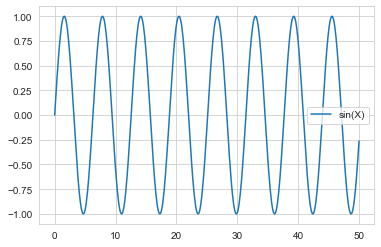

In [81]:
df.plot();

To visualize the forecasts and the original df, we need to index the forecasts. These indexes must also conform to df. The indexes in df went with 0.1 steps and were finally finished at 50.00. Forecasts should follow this as 50.1, 50.2.

In [82]:
forecast_len = len(forecast)
forecast_len

64

In [83]:
step = 0.1

In [84]:
forecast_len * step

6.4

In [85]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [86]:
len(forecast_index)

64

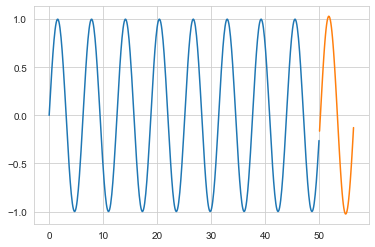

In [87]:
plt.plot(df.index, df['sin(X)'])

plt.plot(forecast_index, forecast);

In [88]:
# Done